## Learning Objectives

Today we are going to learn about how to transform qualitative features into quantitative features and we do so using the most common representation: dummy varibles.

## Back to the data

So in this lesson we jump back to the data and talk about how we transform qualitative values into quantitative ones. 

We have already seen this happen a couple of times when we were making random variables. A heads on a coin became a 1 and a tails 0. Getting a queen became a 1 and otherwise 0. Why did we choose the representations?

## Dummy variables

So in this lesson we will talk about the most common cannonical way to transform these variables: the dummy variable transform.

First let's get our data:

In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/billionaires.csv')

del df['was founder']
del df['inherited']
del df['from emerging']

df.age.replace(-1, np.NaN, inplace=True)
df.founded.replace(0, np.NaN, inplace=True)
df.gdp.replace(0, np.NaN, inplace=True)

Now let's check out some of the qualitative columns:

In [6]:
%matplotlib inline
import seaborn as sns

df['wealth.type'].value_counts()

inherited                   953
founder non-finance         713
self-made finance           500
privatized and resources    236
executive                   190
Name: wealth.type, dtype: int64

The above column has five types with a good spread over types. But let's say we wanted to transform this quantitatvie column into a qualitative one (for example we could be interested in creating a random variable).

What would we do?

One suggestion would be to just make them the numbers 1, 2, 3, 4, 5. But can you already see the problem here? What would happen if we averaged the column? We would get something around 3.1, but what does that mean? The average has lost its meaning. What about the implied relationship between the columns? In this case executive is five times inherited. Does that make any practical sense?

You may be getting the feeling that our problem is impossible. And it certainly is, if you only have one column...

## More dummies

The way to solve this problem is by adding more columns. For the dummy variable approach you can add one column for each type. That way you can't compare the types to each other. But what values do you fill the columns with? 

Well we want the average to mean something right? So filling them with -42 is inherited and 99 is not inherited still leaves us in a situtation where the average still doesn't mean anything. Is there a value that we can use that will actually have meaning?

It turns out that 0 and 1 is pretty good for this. In the inherited column you put a 1 if they did inherit their wealth and a 0 otherwise. In this case what does the average mean?

You guessed it, now the average is the probability that the person is inherited!

## Panda time

So now that we understand what the transformation is, let's use it in practice:

In [11]:
df_new = pd.get_dummies(df, columns=['wealth.type'])

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 23 columns):
age                                     2229 non-null float64
category                                2613 non-null object
citizenship                             2614 non-null object
company.name                            2576 non-null object
company.type                            2578 non-null object
country code                            2614 non-null object
founded                                 2574 non-null float64
gdp                                     949 non-null float64
gender                                  2580 non-null object
industry                                2613 non-null object
name                                    2614 non-null object
rank                                    2614 non-null int64
region                                  2614 non-null object
relationship                            2568 non-null object
sector                                

Using the above command we get all our goodies. Notice that we no longer have our old wealth.type column but instead have 5 new ones, and we can do some interesting things with our data now:

In [12]:
wealth_type_columns = [col for col in df_new.columns if col.startswith('wealth')]

# get all the associated dummy columns
wealth_type_columns

['wealth.type_executive',
 'wealth.type_founder non-finance',
 'wealth.type_inherited',
 'wealth.type_privatized and resources',
 'wealth.type_self-made finance']

In [13]:
df_new.groupby('gender')[wealth_type_columns].mean()

,wealth.type_executive,wealth.type_founder non-finance,wealth.type_inherited,wealth.type_privatized and resources,wealth.type_self-made finance
gender,,,,,
female,0.024096,0.100402,0.823293,0.020080,0.028112
male,0.079038,0.295103,0.310997,0.099227,0.211770
married couple,0.000000,0.333333,0.666667,0.000000,0.000000


Now we can compare how wealth type is distributed over other qualitative variables.

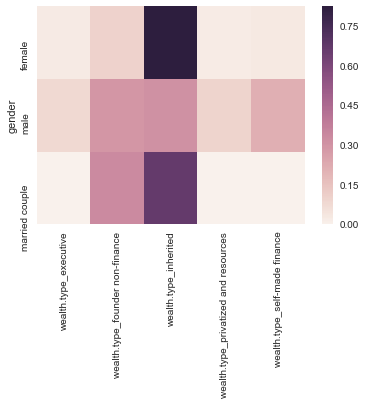

In [14]:
sns.heatmap(df_new.groupby('gender')[wealth_type_columns].mean())

Or we can get the correlations due to wealth type:

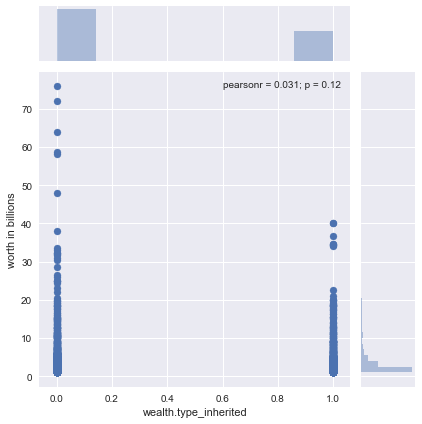

In [20]:
sns.jointplot(x='wealth.type_inherited', y='worth in billions', data=df_new)

## One view

Once again this is just one way of transforming qualitative variables into quantitative variables, and once we do that we can do much of the traditional quantitative variable analysis on them. There are many ways of transforming these variables and if you interested in learning more, please tune in to my videos on patsy where I specifically go over the most common ones.

## Learning Objectives

Today we are going to learn about how to transform qualitative features into quantitative features and we do so using the most common representation: dummy varibles.

## Comprehension Questions

1.	Are there other good representations that you can think of? 
2.	What are the properties of good representations?

